In [289]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [290]:
df = pd.read_csv('housing.csv')

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [292]:
df.dropna(inplace=True)

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [294]:
x = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [295]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [296]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [297]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [298]:
train_df = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

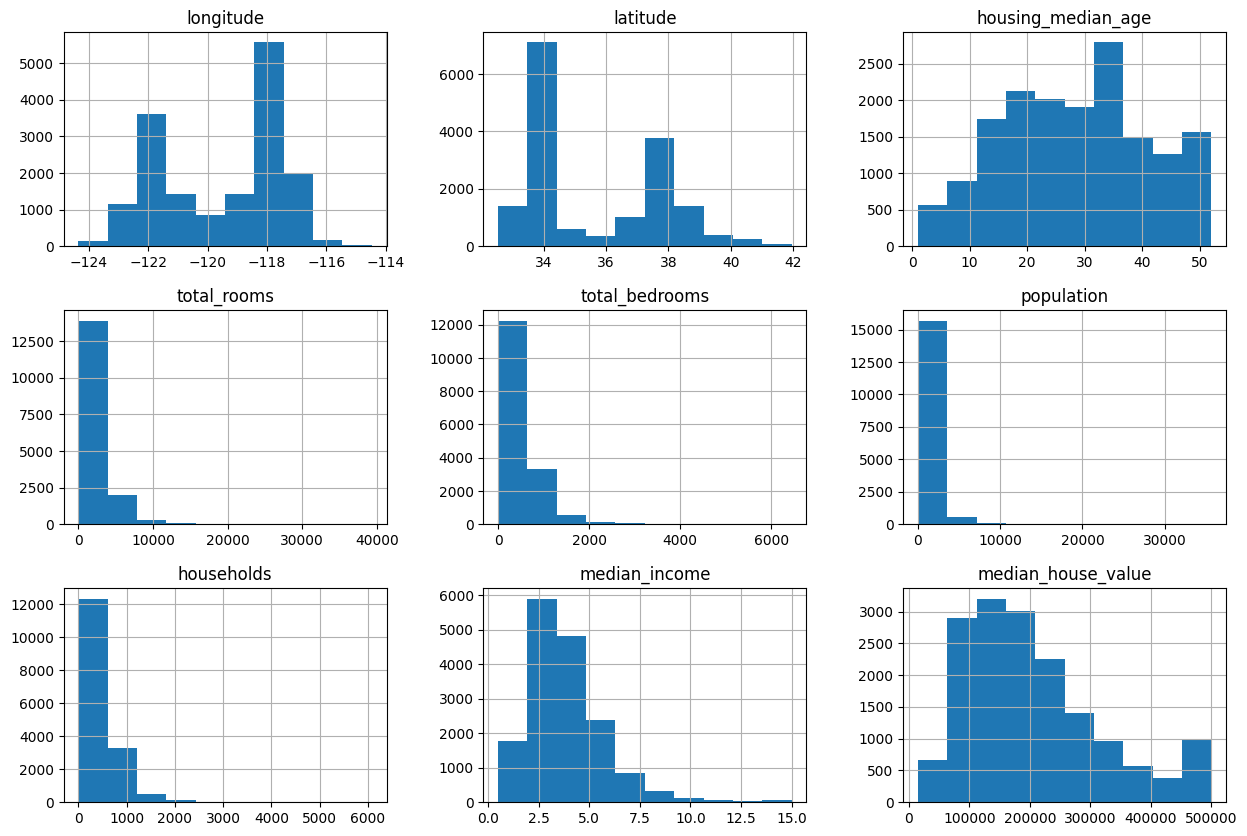

In [299]:
train_df.hist(figsize=(15,10))

In [300]:
train_df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7231
INLAND        5156
NEAR OCEAN    2114
NEAR BAY      1842
ISLAND           3
Name: count, dtype: int64

In [301]:
train_df = train_df.join(pd.get_dummies(train_df.ocean_proximity, dtype=float)).drop(['ocean_proximity'], axis=1)
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,227600.0,1.0,0.0,0.0,0.0,0.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,110400.0,0.0,1.0,0.0,0.0,0.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,248100.0,0.0,1.0,0.0,0.0,0.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,305600.0,1.0,0.0,0.0,0.0,0.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,214600.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,273400.0,1.0,0.0,0.0,0.0,0.0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,160800.0,1.0,0.0,0.0,0.0,0.0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,335400.0,1.0,0.0,0.0,0.0,0.0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,231200.0,0.0,0.0,0.0,1.0,0.0


<Axes: >

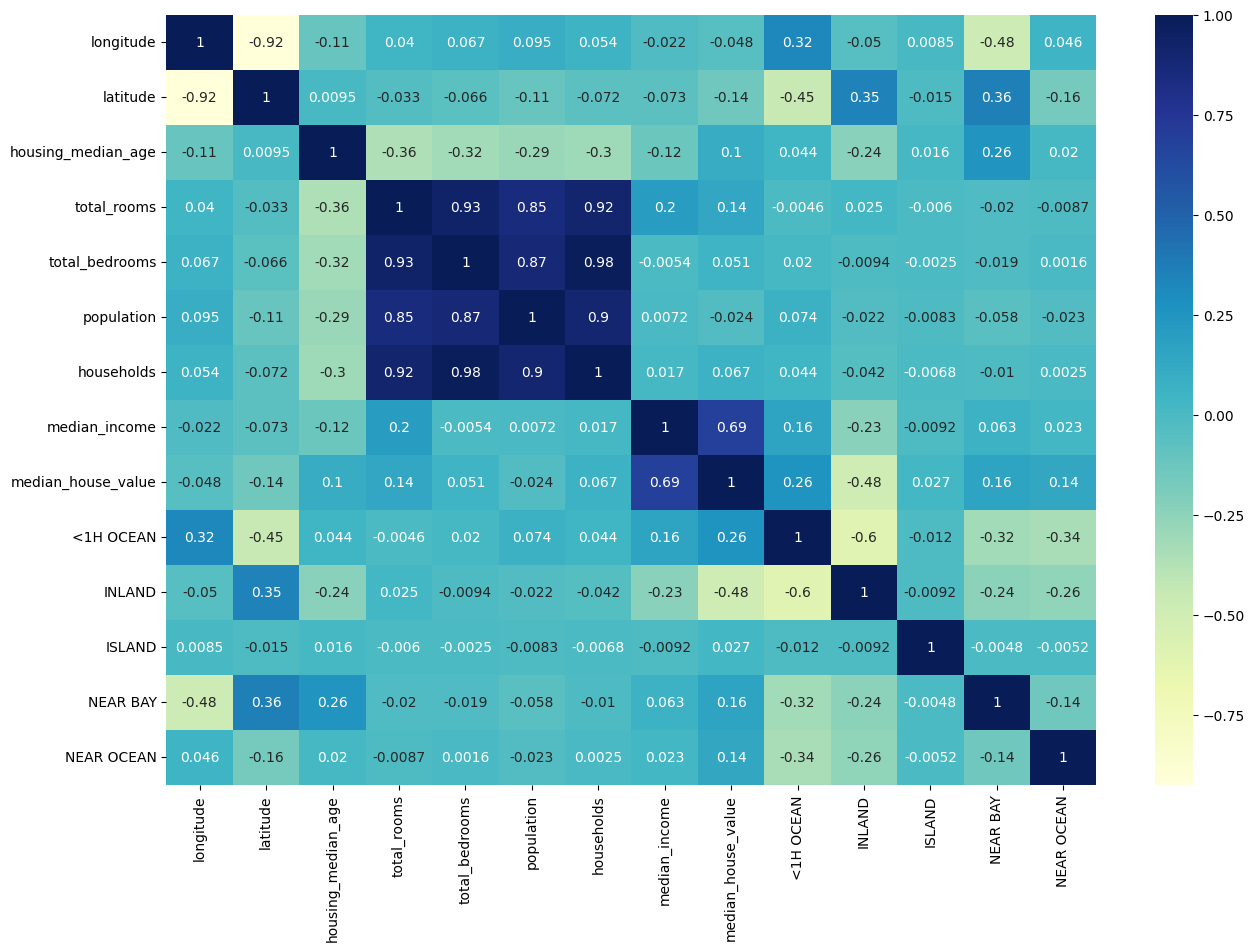

In [302]:
plt.figure(figsize=(15,10))
sns.heatmap(train_df.corr(), annot=True, cmap="YlGnBu")

In [303]:
train_df['bedroom_ratio'] = train_df['total_bedrooms'] / train_df['total_rooms']
train_df['household_rooms'] = train_df['total_rooms'] / train_df['households']

In [304]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,227600.0,1.0,0.0,0.0,0.0,0.0,0.209429,4.951740
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,110400.0,0.0,1.0,0.0,0.0,0.0,0.174710,5.954023
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,248100.0,0.0,1.0,0.0,0.0,0.0,0.217939,5.126482
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,305600.0,1.0,0.0,0.0,0.0,0.0,0.401778,2.642058
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,214600.0,0.0,0.0,0.0,0.0,1.0,0.213159,4.551980


<Axes: >

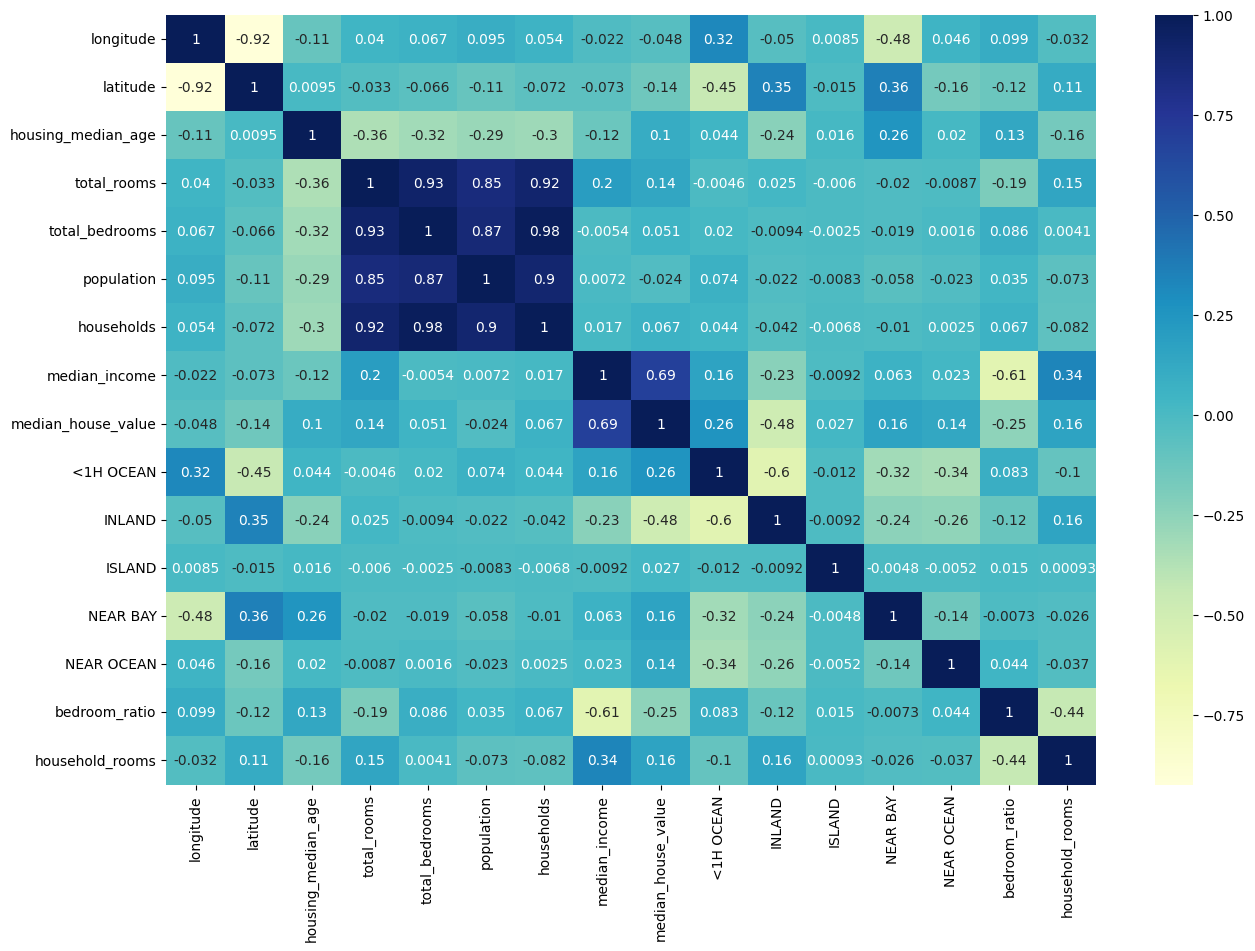

In [305]:
plt.figure(figsize=(15,10))
sns.heatmap(train_df.corr(), annot=True, cmap="YlGnBu")

In [306]:
X_train, y_train = train_df.drop(['median_house_value'], axis=1), train_df["median_house_value"]

In [307]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [308]:
test_df = X_test.join(y_test)


test_df = test_df.join(pd.get_dummies(test_df.ocean_proximity, dtype=float)).drop(['ocean_proximity'], axis=1)
test_df['bedroom_ratio'] = test_df['total_bedrooms'] / test_df['total_rooms']
test_df['household_rooms'] = test_df['total_rooms'] / test_df['households']


In [309]:
X_test, y_test = test_df.drop(['median_house_value'], axis=1), test_df["median_house_value"]

In [310]:
lr.score(X_test, y_test)

0.6513824308446607

In [311]:
from sklearn.linear_model import Ridge
ridge_1 = Ridge(alpha=1.0)
ridge_2 = Ridge(alpha=2.0)
ridge_3 = Ridge(alpha=3.0)
ridge_4 = Ridge(alpha=4.0)
ridge_5 = Ridge(alpha=5.0)

In [312]:
ridge_1.fit(X_train, y_train)
ridge_score_1 = ridge_1.score(X_test, y_test)
ridge_score_1

0.6520316925844221

In [313]:
ridge_2.fit(X_train, y_train)
ridge_score__2 = ridge_2.score(X_test, y_test)
ridge_score__2

0.6523952407118179

In [314]:
ridge_3.fit(X_train, y_train)
ridge_score_3 = ridge_3.score(X_test, y_test)
ridge_score_3

0.6526178585667151

In [315]:
ridge_4.fit(X_train, y_train)
ridge_score_4 = ridge_4.score(X_test, y_test)
ridge_score_4

0.6527592688417929

In [316]:
ridge_5.fit(X_train, y_train)
ridge_score_5 = ridge_5.score(X_test, y_test)
ridge_score_5

0.6528488100151972